# Clustering Data with Machine Learning
Another common task in data analysis is clustering data into groups using automated algorithms. There are machine learning algorithms to iteratively collects points together and form clusters. These are generally classified as _unsupervised_ learning because there is no direct input (data or otherwise) from the user required.

To demonstrate, we will go through an example here. The point is to show how algorithms can learn features about data that we care about.

The [Scikit Learn](https://scikit-learn.org/stable/user_guide.html) is a toolkit we can use to quickly generate a few clusters of data in two dimensions and we demonstrate how to do that here:

(400, 2) (400,) (4, 2)


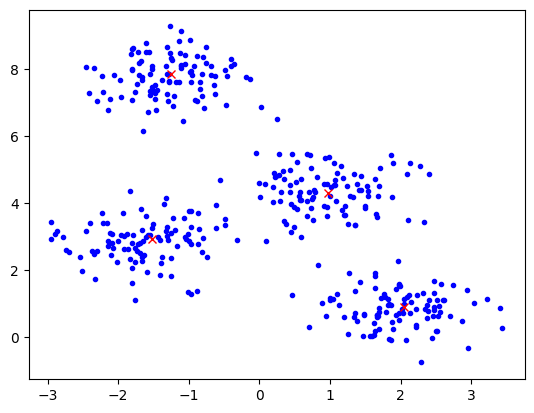

In [4]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import time
import IPython.display as ipydis
npoints = 400
N = 4
x, cluster_labels, cluster_centers = make_blobs(n_samples=npoints, centers=N,
                       cluster_std=0.60, random_state=0,
                       return_centers=True)
print(x.shape,cluster_labels.shape,cluster_centers.shape)
plt.plot(x[:, 0], x[:, 1],'b.')
plt.plot(cluster_centers[:,0],cluster_centers[:,1],'rx')

Here `x` is an array of the data points, `cluster_labels` is an array which labels to which group each point belongs (0-3), `cluster_centers` is a list of the 4 cluster center points.


# K-means

_K-means_ is a straightforward method to understand that follows these steps:
1. Given a set of points $x$, randomly select $N$ center points, or centroids, $c$.
2. Calculate the distance of each point to each centroid.
3. Assign points the label $0$ to $(N-1)$ based on to which centroid they are closest.
4. Calculate new centroids based on the center of mass of each cluster of points.
5. Repeat Steps 2-4 until one of these occurs:
   - centroids no longer shift more than some defined distance, $\delta$
   - no points change their label
   - some predefined iteration max, $N_{iter}$, is reached


In [5]:
def initialize_centroids(x,N):
   x_indices = np.random.choice(np.arange(0,x.shape[0]),N)
   centroids = x[x_indices]
   return centroids

def get_new_centroids(x, labels, N):
    """returns the new centroids assigned from the points closest to them"""
    return np.array([x[labels==k].mean(axis=0) for k in range(N)])

In [6]:
# distance is sqrt( (x - x')**2 + (y - y')**2 )
def assign_labels(x,c):
   # centroids are shape [N,2]
   # x are shape [npoints,2]
   # add middle index to centroids to properly broadcast in math operations
   c = c[:,np.newaxis,:] # [N,1,2]
   
   # calculate (x - x')**2 and (y - y')**2
   # x is shape [npoints,2], c is [N,1,2] results in an array of shape: [N,npoints,2]
   dist2 = (x - c)**2
   
   # calculate (x - x')**2 + (y - y')**2
   dist2 = dist2.sum(axis=2) # [N,npoints]
   
   # out of the N distances, return the index (0-(N-1)) of the one that is the minimum.
   label = np.argmin(dist2,axis=0) # [npoints]

   return label

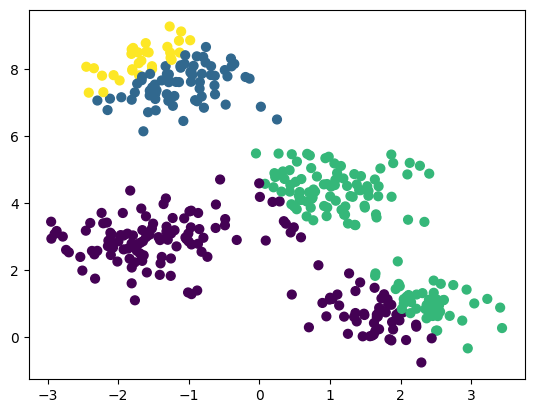

In [7]:
c = initialize_centroids(x,N)
l = assign_labels(x,c)
plt.scatter(x[:, 0], x[:, 1], c=l, s=40, cmap='viridis')

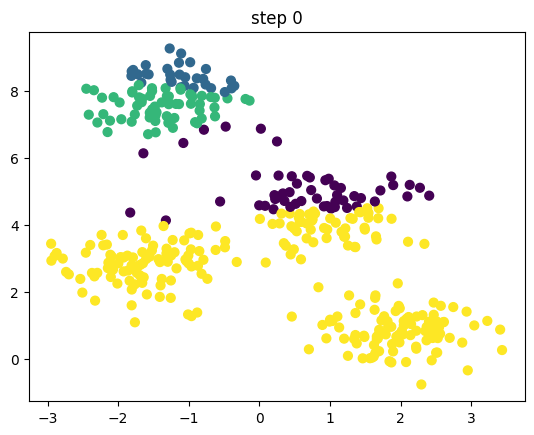

In [8]:
delta = 0.01
last_centroids = initialize_centroids(x,N)
last_labels = assign_labels(x,last_centroids)
step = 0
plt.scatter(x[:, 0], x[:, 1], c=last_labels, s=40, cmap='viridis')
plt.title('step %d' % -1)
plt.show()
time.sleep(1)
ipydis.clear_output(wait=True)

centroids = get_new_centroids(x,last_labels,N)
labels = assign_labels(x,centroids)

# test if centroids have stopped moving
if np.all((last_centroids - centroids) < delta):
   print('centroids unchanged as of step %d' % step)
   # done
elif np.all(labels == last_labels):
   print('point labels unchanged as of step %d' % step)
   # done
else:
   last_labels = labels
   last_centroids = centroids

plt.scatter(x[:, 0], x[:, 1], c=last_labels, s=40, cmap='viridis')
plt.title('step %d' % step)
plt.show()



# Homework
Follow the example from the previous notebook [Linear Regression using SGD](./01_linear_regression_sgd.ipynb) and build a loop that properly finds the centers of these 4 clusters using k-means.

# ANSWER Below

point labels unchanged as of step 2


Text(0.5, 1.0, 'step 2')

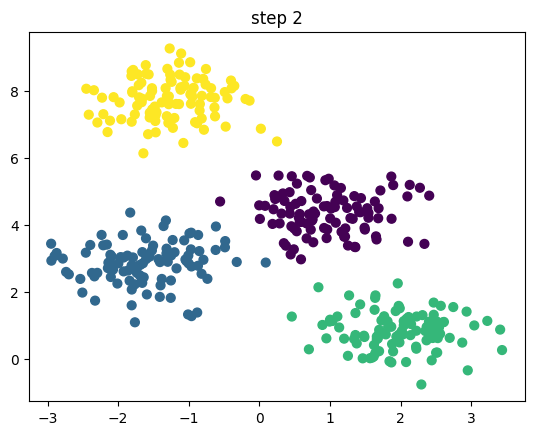

In [9]:
delta = 0.01
last_centroids = initialize_centroids(x,N)
last_labels = assign_labels(x,last_centroids)

plt.scatter(x[:, 0], x[:, 1], c=last_labels, s=40, cmap='viridis')
plt.title('step %d' % -1)
plt.show()
time.sleep(1)
ipydis.clear_output(wait=True)

for step in range(30):
   centroids = get_new_centroids(x,last_labels,N)
   labels = assign_labels(x,centroids)

   # test if centroids have stopped moving
   if np.all((last_centroids - centroids) < delta):
      print('centroids unchanged as of step %d' % step)
      break
   elif np.all(labels == last_labels):
      print('point labels unchanged as of step %d' % step)
      break
   else:
      last_labels = labels
      last_centroids = centroids

   plt.scatter(x[:, 0], x[:, 1], c=last_labels, s=40, cmap='viridis')
   plt.title('step %d' % step)
   plt.show()
   time.sleep(1)
   plt.close('all')
   ipydis.clear_output(wait=True)

plt.scatter(x[:, 0], x[:, 1], c=last_labels, s=40, cmap='viridis')
plt.title('step %d' % step)